<a href="https://colab.research.google.com/github/pitaconsumer/pitaconsumer.github.io./blob/master/Supervised_Model_Predict_Open_Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective: **
Generate at least 2 features to predict whether email opened or not.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #Transform categorical features

In [ ]:
#Need to Mount
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 1: Open Data**

In [ ]:
#Open file
email_file = ('/content/data_set.csv.gz') #/Users/mehrunisaqayyum/Downloads/data_set.csv.gz')
df = pd.read_csv(email_file)
df

,email,subscribed_date,segments,previous_opens,was_opened
0,32960@spam.com,2020-10-05,"[""b"", ""d"", ""a""]",0,OPENED
1,22200@robots.com,2020-11-17,"[""c""]",4,NOT OPENED
2,39516@spam.com,2020-07-01,"[""d"", ""c""]",1,NaN
3,6980@realpeople.com,2020-09-06,"[""b"", ""c""]",0,NOT OPENED
4,88430@spam.com,2020-09-03,"[""b""]",5,NOT OPENED
...,...,...,...,...,...
99995,43775@robots.com,2020-07-05,[],2,NOT OPENED
99996,9186@spam.com,2020-07-19,[],8,NOT OPENED
99997,18464@realpeople.com,2020-03-05,"[""a"", ""b"", ""d""]",0,NOT OPENED
99998,55503@spam.com,2020-04-06,[],3,NOT OPENED


**Step 2: Explore Data**

In [ ]:
df.columns

Index(['email', 'subscribed_date', 'segments', 'previous_opens', 'was_opened'], dtype='object')

*Visualize Heatmap*

In [ ]:

#(pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]),cmap="YlGnBu", annot=True, cbar=False)
#sns.heatmap.pd.crosstab([target_by_maga.Advertiser_Name,target_by_maga.Geo_Targeting_Included], [target_by_maga.Ad_Type, target_by_maga.Spend_Range_Min_USD]),cmap="YlGnBu", annot=True, cbar=False)

In [ ]:
df.subscribed_date.dtype

dtype('O')

In [ ]:
df.describe()

,email,subscribed_date,segments,previous_opens,was_opened
count,98996,98949,99031,98934,98981
unique,83756,434,49,37,10
top,a,2020-03-03,[],0,NOT OPENED
freq,137,283,24688,9012,78688


In [ ]:
#Look for missing values
df.isnull().sum()

email              1004
subscribed_date    1051
segments            969
previous_opens     1066
was_opened         1019
dtype: int64

In [ ]:
df.value_counts('was_opened')

was_opened
NOT OPENED    78688
OPENED        19282
synthetic       138
I'm             137
a               133
Help            127
set             126
stuck           125
in              114
data            111
dtype: int64

We see that 19,282 opened. But 78,688 'NOT OPENED'

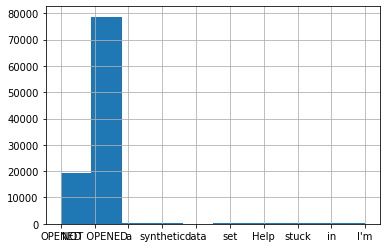

In [ ]:
#Plot values outside of 'NOT OPENED' & "OPENED"
df['was_opened'].hist()
plt.show()

**Step 3: Clean Data**
*Phase 1*

In [ ]:
#Clean 'was_opened' | Splice rows for only 'NOT OPENED' and 'OPENED
df_not_open = df[(df.was_opened == 'NOT OPENED')] # & (df.was_opened == 'OPENED')]
df_not_open

,email,subscribed_date,segments,previous_opens,was_opened
1,22200@robots.com,2020-11-17,"[""c""]",4,NOT OPENED
3,6980@realpeople.com,2020-09-06,"[""b"", ""c""]",0,NOT OPENED
4,88430@spam.com,2020-09-03,"[""b""]",5,NOT OPENED
5,31472@robots.com,2020-06-27,"[""d""]",4,NOT OPENED
6,29063@robots.com,2020-02-10,[],10,NOT OPENED
...,...,...,...,...,...
99995,43775@robots.com,2020-07-05,[],2,NOT OPENED
99996,9186@spam.com,2020-07-19,[],8,NOT OPENED
99997,18464@realpeople.com,2020-03-05,"[""a"", ""b"", ""d""]",0,NOT OPENED
99998,55503@spam.com,2020-04-06,[],3,NOT OPENED


In [ ]:
#set with opened emails 
df_open = df[(df.was_opened == 'OPENED')]
df_open

,email,subscribed_date,segments,previous_opens,was_opened
0,32960@spam.com,2020-10-05,"[""b"", ""d"", ""a""]",0,OPENED
12,9714@realpeople.com,2020-07-11,"[""d"", ""a"", ""b""]",6,OPENED
18,42556@realpeople.com,2021-01-26,"[""a"", ""c"", ""d""]",7,OPENED
23,56675@realpeople.com,2020-04-07,"[""c"", ""b""]",6,OPENED
25,69099@spam.com,2020-10-18,"[""b""]",1,OPENED
...,...,...,...,...,...
99978,23113@realpeople.com,2020-12-20,"[""d"", ""b"", ""c""]",2,OPENED
99981,55158@realpeople.com,2020-09-15,"[""d"", ""c"", ""b""]",stuck,OPENED
99988,82197@spam.com,2020-05-04,"[""a""]",10,OPENED
99992,79325@spam.com,2020-12-31,"[""d"", ""c"", ""a""]",2,OPENED


In [ ]:
#combine closed and opened into 1 file
df_clean = pd.concat([df_not_open,df_open],ignore_index=True, sort =True)
df_clean

,email,previous_opens,segments,subscribed_date,was_opened
0,22200@robots.com,4,"[""c""]",2020-11-17,NOT OPENED
1,6980@realpeople.com,0,"[""b"", ""c""]",2020-09-06,NOT OPENED
2,88430@spam.com,5,"[""b""]",2020-09-03,NOT OPENED
3,31472@robots.com,4,"[""d""]",2020-06-27,NOT OPENED
4,29063@robots.com,10,[],2020-02-10,NOT OPENED
...,...,...,...,...,...
97965,23113@realpeople.com,2,"[""d"", ""b"", ""c""]",2020-12-20,OPENED
97966,55158@realpeople.com,stuck,"[""d"", ""c"", ""b""]",2020-09-15,OPENED
97967,82197@spam.com,10,"[""a""]",2020-05-04,OPENED
97968,79325@spam.com,2,"[""d"", ""c"", ""a""]",2020-12-31,OPENED


In [ ]:
 #We have Email Open Rate of 25%
19282/78688 

#Dirty record: 
# synthetic       138
# I'm             137
# a               133
# Help            127
# set             126
# stuck           125
# in              114
# data            111

0.24504371695811306

In [ ]:
#Look for previous_open trends
df_clean.value_counts('previous_opens')

previous_opens
0            8847
1            8695
8            8685
2            8679
3            8677
9            8656
5            8627
10           8615
7            8586
4            8576
6            8526
I'm           137
stuck         129
in            126
data          120
a             119
set           113
synthetic     110
Help          110
32             88
16             79
64             64
80             58
24             58
40             57
48             57
56             39
112            38
72             33
20             32
160            31
96             30
144            28
12             28
36             27
28             21
128            20
dtype: int64

**Step 4: Select Feature** *Phase 1*

Continue cleaning 'previous_opens' column for first selected feature.

In [ ]:
#Attempt to fix parse issue w/'stuck'
print(df_clean[pd.to_numeric(df_clean.previous_opens, errors='coerce').isnull()])

                      email previous_opens  ... subscribed_date  was_opened
49           34408@spam.com          stuck  ...      2020-11-07  NOT OPENED
88      3830@realpeople.com           data  ...      2020-04-09  NOT OPENED
177          73351@spam.com            I'm  ...      2020-10-21  NOT OPENED
213        19583@robots.com            NaN  ...      2020-03-01  NOT OPENED
354    36312@realpeople.com             in  ...      2020-12-18  NOT OPENED
...                     ...            ...  ...             ...         ...
97785        57845@spam.com              a  ...      2020-02-18      OPENED
97813         4504@spam.com            NaN  ...      2020-09-11      OPENED
97849  97199@realpeople.com            NaN  ...      2021-01-16      OPENED
97913  54633@realpeople.com           data  ...      2020-04-06      OPENED
97966  55158@realpeople.com          stuck  ...      2020-09-15      OPENED

[2013 rows x 5 columns]


In [ ]:
#exploring these columns & overwrite dataframe to exclude 'NA' records from target variable
df_clean = df_clean.loc[df_clean.was_opened.notna(),['previous_opens','subscribed_date','email','was_opened']]
df_clean.shape


(97970, 4)

In [ ]:
#Target is 'was_opened'
df_clean.isnull().sum()

previous_opens     1049
subscribed_date    1027
email               987
was_opened            0
dtype: int64

In [ ]:
#Drop the 'subscribed_date' column: df.drop(columns=['B', 'C'])
df_clean = df_clean.drop(columns=['subscribed_date'])

In [ ]:
#Drop NaN rows from cleaned dataframe to run through Model for prediction 
df_clean.dropna()

,previous_opens,email,was_opened
0,4,22200@robots.com,NOT OPENED
1,0,6980@realpeople.com,NOT OPENED
2,5,88430@spam.com,NOT OPENED
3,4,31472@robots.com,NOT OPENED
4,10,29063@robots.com,NOT OPENED
...,...,...,...
97965,2,23113@realpeople.com,OPENED
97966,stuck,55158@realpeople.com,OPENED
97967,10,82197@spam.com,OPENED
97968,2,79325@spam.com,OPENED


In [ ]:
df_clean.head()

,previous_opens,subscribed_date,email,was_opened
0,4,2020-11-17,22200@robots.com,NOT OPENED
1,0,2020-09-06,6980@realpeople.com,NOT OPENED
2,5,2020-09-03,88430@spam.com,NOT OPENED
3,4,2020-06-27,31472@robots.com,NOT OPENED
4,10,2020-02-10,29063@robots.com,NOT OPENED


In [ ]:
df_clean.iloc[97964:97970] #stuck still in 'previous_opens'

,previous_opens,email,was_opened
97964,8,9897@realpeople.com,OPENED
97965,2,23113@realpeople.com,OPENED
97966,stuck,55158@realpeople.com,OPENED
97967,10,82197@spam.com,OPENED
97968,2,79325@spam.com,OPENED
97969,7,70054@realpeople.com,OPENED


In [ ]:
df.previous_opens.dtype

dtype('O')

In [ ]:
#Print 'previous_opens' cleaned as numeric
print(df_clean[pd.to_numeric(df_clean.previous_opens, errors='coerce').notnull()])

       previous_opens                 email  was_opened
0                 4.0      22200@robots.com  NOT OPENED
1                 0.0   6980@realpeople.com  NOT OPENED
2                 5.0        88430@spam.com  NOT OPENED
3                 4.0      31472@robots.com  NOT OPENED
4                10.0      29063@robots.com  NOT OPENED
...               ...                   ...         ...
97964             8.0   9897@realpeople.com      OPENED
97965             2.0  23113@realpeople.com      OPENED
97967            10.0        82197@spam.com      OPENED
97968             2.0        79325@spam.com      OPENED
97969             7.0  70054@realpeople.com      OPENED

[95957 rows x 3 columns]


In [ ]:
#Clean 'previous_opens'
#df[['average_rating']] = df[['average_rating']].apply(pd.to_numeric, errors='coerce')
df_clean[['previous_opens']] = df_clean[['previous_opens']].apply(pd.to_numeric, errors='coerce')
df_clean

,previous_opens,email,was_opened
0,4.0,22200@robots.com,NOT OPENED
1,0.0,6980@realpeople.com,NOT OPENED
2,5.0,88430@spam.com,NOT OPENED
3,4.0,31472@robots.com,NOT OPENED
4,10.0,29063@robots.com,NOT OPENED
...,...,...,...
97965,2.0,23113@realpeople.com,OPENED
97966,NaN,55158@realpeople.com,OPENED
97967,10.0,82197@spam.com,OPENED
97968,2.0,79325@spam.com,OPENED


In [ ]:
# drop 'NA' from proposed feature variables

df_clean = df_clean.loc[df_clean['was_opened'].notna(), [df_clean.previous_opens.notna()]]

ValueError: ignored

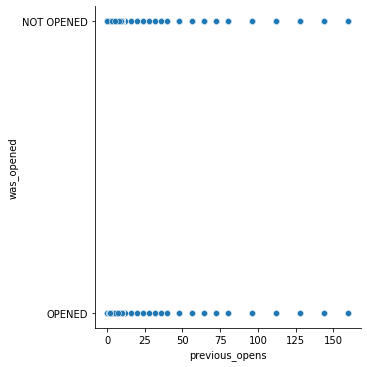

In [ ]:
#Regression Plot
r_plot = sns.relplot(x='previous_opens', y= 'was_opened', data=df_clean)


In [ ]:
#Select all rows with any null
df_any_null = df_clean[pd.isnull(df_clean).any(axis=1)]
df_any_null

In [ ]:
#Bad ones we should eliminate from 'previous_opens'
print(df_clean[pd.to_numeric(df_clean.previous_opens, errors='coerce').isnull()])

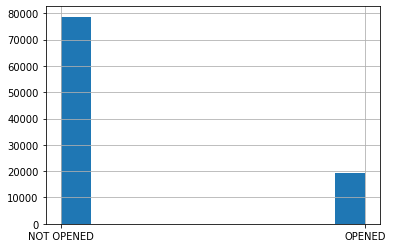

In [ ]:
df_clean['was_opened'].hist()
plt.show()

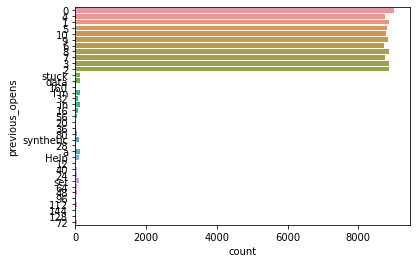

In [ ]:
sns.countplot(y='previous_opens', data=df)

**Step 4: Select Feature**  *Phase 2*
* Requirement: At least one of the two features selected must relate to the email address.
* Clean 'Email' column  noting instance of 'spam' to develop 2nd feature

If domain contains spam.com, then bad record, won't likely open, so can be used to detect.


In [ ]:
#Select 'email' as feature and review 'spam' string
df_clean['email']

0            22200@robots.com
1         6980@realpeople.com
2              88430@spam.com
3            31472@robots.com
4            29063@robots.com
                 ...         
97965    23113@realpeople.com
97966    55158@realpeople.com
97967          82197@spam.com
97968          79325@spam.com
97969    70054@realpeople.com
Name: email, Length: 97970, dtype: object

In [ ]:
#Suggested: df['domain'] = df['email'].str.split('@').str[1]
#df = pd.DataFrame(df.col) 
df_clean['domain'] = df_clean['email'].str.split("@")[1].split(".")[0] 
print(df_clean)

AttributeError: ignored

In [ ]:
#Contains spam in domain to retrieve those specific records
## From: df['domain'] = df['email'].str.split('@').str[1]
df_clean[['domain']] = pd.DataFrame['email']({'email':['spam']})

TypeError: ignored

In [ ]:
df_clean[['domain']] = df_clean['email'].str.split("@")[1].split(".")[0]

AttributeError: ignored

In [ ]:
#Add feature_2 Contains spam in domain
df_clean['feature_2'] = df_clean[df_clean.email.str.count('spam')]
df_clean['feature_2']

KeyError: ignored

**Step 5: Model**

Target variable is 'was_opened'.
Features = transformed email column

*   'contains_spam'
*   'previous_opens' >= 2 times



In [ ]:
#Test w/1 feature
x = df_clean.loc[1:2200,['previous_opens']].dropna()
y = df_clean.loc[1:2181,['was_opened']].dropna()

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
#Train model with feature: df = cleaned['col1'.notna(),['col2', 'col3']]

df_model = df_clean.loc[df_clean.was_opened.notna(), ['was_opened','previous_opens']]

In [ ]:
df_model.shape

(97970, 2)

In [ ]:
df_model

,was_opened,previous_opens
0,NOT OPENED,4.0
1,NOT OPENED,0.0
2,NOT OPENED,5.0
3,NOT OPENED,4.0
4,NOT OPENED,10.0
...,...,...
97965,OPENED,2.0
97966,OPENED,NaN
97967,OPENED,10.0
97968,OPENED,2.0


In [ ]:
#
X = df_model.loc[:, ['previous_opens']] #Features Used to Predict

y = df_model['was_opened']  #Target

In [ ]:
#Running Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

*Add in Second Feature to Model*

In [ ]:
#Define 'X_2' features by dropping 'y'
X_2 = df_clean['previous_opens','feature_2'].dropna() #Features Used to Predict
y = df_clean['was_opened'] #Target

KeyError: ignored

**Step 6: Cross Validate**

Cross validate a Model w/1 feature.
*   *When company tested, achieved .75 AUC ROC curve.*
*  Sample code
X = df.loc[:, ['Pclass']]
y = df.Survived

In [ ]:
#Import Cross Val from Sklearn library
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn

nan

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#Five-fold accuracy
cross_val_score(logreg,x_2, y, cv=5, scoring='accuracy').mean()

***Adding Third Feature***

In [ ]:
#Convert 'subscribed_date' to time
#df['transformed_time_f'] = pd.to_datetime(df['Gun Tim'], format='%H:%M:%S', errors='coerce')
transform_subscribed_date = pd.to_datetime(df_clean['subscribed_date'], format='%H:%M:%S', errors='coerce')
transform_subscribed_date

In [ ]:
#third feature 
column_trans = make_column_transformer(
    (OneHotEncoder(), ['previous_opens','feature_2']),
    remainder='passthrough')

In [ ]:
#transform predicting variables
column_trans.fit_transform(x_2)

*Pre-Processing: One Hot Encoding*

In [ ]:
#Transform into dummy variable
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [ ]:
ohe.fit_transform(df_clean[['was_opened']])

In [ ]:
#check dummy variable for target column
ohe.categories_

In [ ]:
# use when other features need different preprocessing
from sklearn.compose import make_column_transformer